In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/train - train.csv")

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
#Since the missing values is not that much (less than 2% of the whole data)
#we use fillna with the mode value

df = df.fillna(df.mode().iloc[0])

In [6]:
Train_df = df

After some experiments, we figuered that the width, height and depth can be in 1 category which is volume, it increased the accuracy of our model by 0.5% for our classifiers

In [7]:
Train_df['volume'] = df['sc_w'] * df['sc_h'] * df['m_dep']

In [8]:
# Drop the columns 'sc_w', 'sc_h', 'm_dep' from the DataFrame
Train_df = Train_df.drop(['sc_w', 'sc_h', 'm_dep'], axis=1)


In [9]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   float64
 7   mobile_wt      2000 non-null   float64
 8   n_cores        2000 non-null   float64
 9   pc             2000 non-null   float64
 10  px_height      2000 non-null   float64
 11  px_width       2000 non-null   float64
 12  ram            2000 non-null   float64
 13  talk_time      2000 non-null   int64  
 14  three_g        2000 non-null   int64  
 15  touch_screen   2000 non-null   int64  
 16  wifi           2000 non-null   int64  
 17  price_range    2000 non-null   int64  
 18  volume  

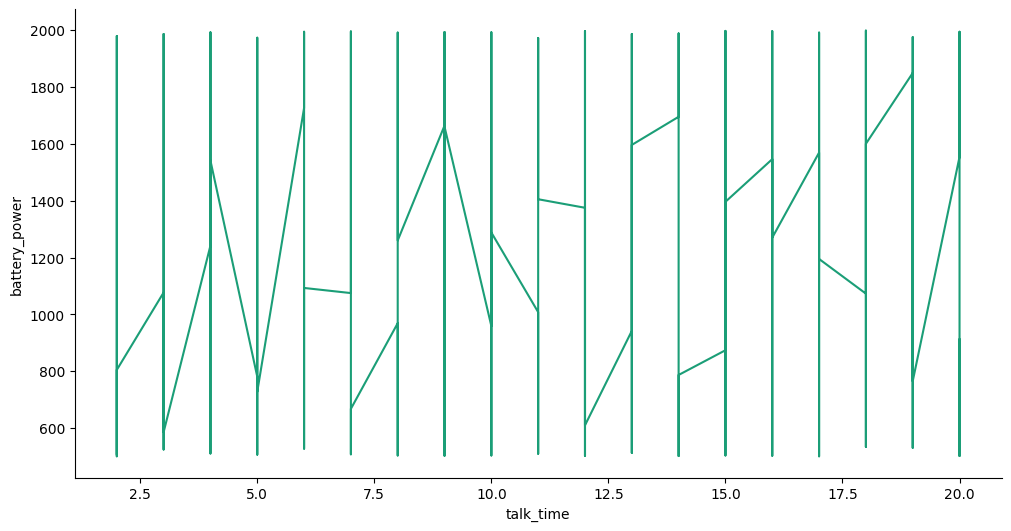

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['talk_time']
  ys = series['battery_power']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Train_df.sort_values('talk_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('talk_time')
_ = plt.ylabel('battery_power')

From the previous plot, we see that whenever the battery power is high, the talk time increases as well

<Figure size 1200x800 with 0 Axes>

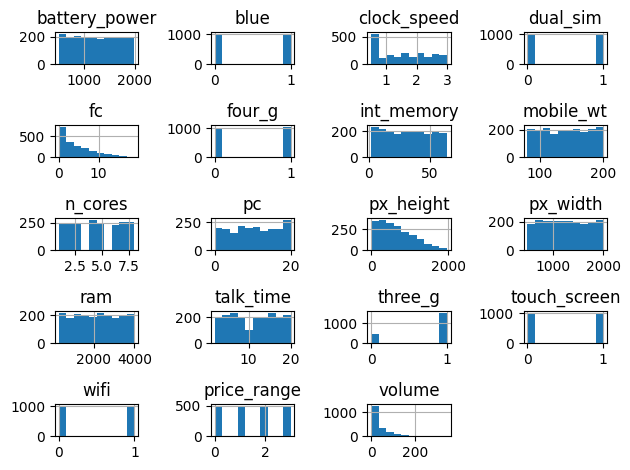

In [10]:
plt.figure(figsize=(12, 8))
Train_df.hist()
plt.tight_layout()
plt.show()

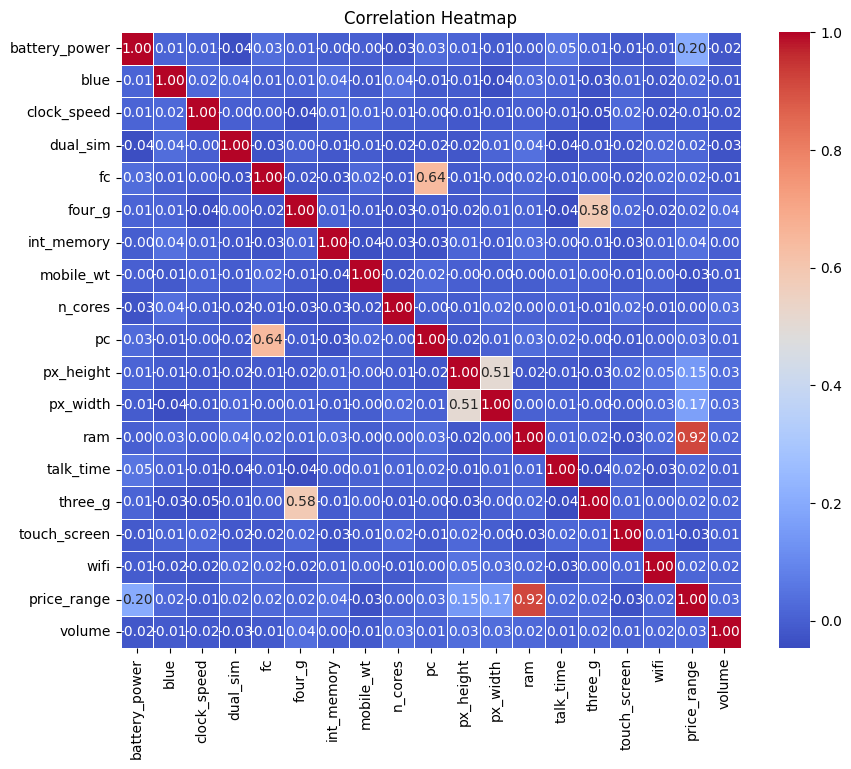

In [11]:
# Compute the correlation matrix
correlation_matrix = Train_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

As we can see from the previous figure, the dataset is not highly correlated, so we will leave the columns for now as they are

In [12]:
# Extracting features (X) by dropping the target column
X = Train_df.drop(columns=['price_range'])

# Extracting the target variable (y)
y = Train_df['price_range']

####Training

#####Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8775

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.87      0.86      0.86        91
           2       0.77      0.83      0.80        92
           3       0.92      0.87      0.89       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.87       400
weighted avg       0.88      0.88      0.88       400


Confusion Matrix:
[[100   5   0   0]
 [  5  78   8   0]
 [  0   7  76   9]
 [  0   0  15  97]]


In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on X and y
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.878125


In [16]:
# Initialize the Random Forest Classifier with the best parameters
rf_classifier_best = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier on the train dataset (X_train, y_train)
rf_classifier_best.fit(X_train, y_train)

y_pred = rf_classifier_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.885

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.86      0.86      0.86        91
           2       0.80      0.83      0.81        92
           3       0.93      0.89      0.91       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400


Confusion Matrix:
[[100   5   0   0]
 [  6  78   7   0]
 [  0   8  76   8]
 [  0   0  12 100]]


Even with running grid search for getting the best results, the scores improved with 0.8% only.

#####KNN Classifier

In [17]:
knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9425

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       105
           1       0.92      0.92      0.92        91
           2       0.89      0.92      0.91        92
           3       0.98      0.94      0.96       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400


Confusion Matrix:
[[103   2   0   0]
 [  4  84   3   0]
 [  0   5  85   2]
 [  0   0   7 105]]


In [18]:
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy')

# Perform grid search on X and y
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Best Score: 0.9305


In [19]:
# Initialize the K-Nearest Neighbors Classifier with the best parameters
knn_classifier_best = KNeighborsClassifier(**best_params)

# Train the classifier on the training data
knn_classifier_best.fit(X_train, y_train)

y_pred = knn_classifier_best.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       105
           1       0.92      0.93      0.93        91
           2       0.91      0.93      0.92        92
           3       1.00      0.94      0.97       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400


Confusion Matrix:
[[104   1   0   0]
 [  4  85   2   0]
 [  0   6  86   0]
 [  0   0   7 105]]


#####SVM

In [20]:
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1],       # Regularization parameter
    'kernel': ['linear', 'rbf']   # Kernel type
}

# Initialize the Support Vector Machine Classifier
svm_classifier = SVC()

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5, scoring='accuracy')

# Perform grid search on X_train and y_train
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and best score for SVM
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Parameters for SVM:", best_params_svm)
print("Best Score for SVM:", best_score_svm)

# Use the best parameters obtained from grid search to train SVM
svm_classifier_best = SVC(**best_params_svm)

# Train the classifier on the training data
svm_classifier_best.fit(X_train, y_train)

y_pred = svm_classifier_best.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Best Score for SVM: 0.9668749999999999
Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       105
           1       0.97      0.99      0.98        91
           2       0.98      0.98      0.98        92
           3       0.98      0.98      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400


Confusion Matrix:
[[102   3   0   0]
 [  1  90   0   0]
 [  0   0  90   2]
 [  0   0   2 110]]


After experimenting with 3 classifiers (Random Forest, KNN and SVM) and running them on grid search to get the best possible outcome, it is noticed that the SVM got us the best possible outcome on the training data with accuracy of 97.25% then the KNN with 94.75%

After some feature engineering we were able to increase the accuracy by 0.5 for our KNN and SVM


#Saving Model

In [22]:
from joblib import dump

# Save the trained model to a file
dump(svm_classifier_best, 'svm_classifier_best.joblib')

['svm_classifier_best.joblib']